### Оценки математического ожидания, дисперсии, медианы

#### 1. Пусть случайная величина $\xi$ имеет распределение с плотностью $f_\xi(x) = \theta^2 \cdot x \cdot e^{-\theta x}$. Для каждого $\theta \in {0.5, 2, 8}$:

(a) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$.

Математическое ожидание:

$$
E[\xi] = \int_{0}^{\infty} x f_\xi(x) dx = \int_{0}^{\infty} x \cdot \theta^2 \cdot x \cdot e^{-\theta x} dx = \theta^2 \int_{0}^{\infty} x^2 e^{-\theta x} dx
$$
$$
u = x^2, du = 2x dx
$$
$$
dv = e^{-\theta x} dx, v = -\frac{1}{\theta} e^{-\theta x}
$$
$$
\theta^2 \int_{0}^{\infty} x^2 e^{-\theta x} dx = \theta^2 \left[ -\frac{1}{\theta} x^2 e^{-\theta x} \Big|_{0}^{\infty} + \frac{2}{\theta} \int_{0}^{\infty} x e^{-\theta x} dx \right]
$$
$$
u' = x, du' = dx
$$
$$
dv' = e^{-\theta x} dx, v' = -\frac{1}{\theta} e^{-\theta x}
$$
$$
\theta^2 \left[ -\frac{1}{\theta} x^2 e^{-\theta x} \Big|_{0}^{\infty} + \frac{2}{\theta} \left( -\frac{1}{\theta} x e^{-\theta x} \Big|_{0}^{\infty} + \frac{1}{\theta} \int_{0}^{\infty} e^{-\theta x} dx \right) \right]
$$
$$
= \theta^2 \left[ 0 + \frac{2}{\theta} \left( 0 + \frac{1}{\theta} \cdot \frac{1}{\theta} \right) \right] = \frac{2}{\theta}
$$

---

$$
E[\xi^2] = \int_{0}^{\infty} x^2 f_\xi(x) dx = \int_{0}^{\infty} x^2 \cdot \theta^2 \cdot x \cdot e^{-\theta x} dx = \theta^2 \int_{0}^{\infty} x^3 e^{-\theta x} dx
$$
$$
u = x^3, du = 3x^2 dx
$$
$$
dv = e^{-\theta x} dx, v = -\frac{1}{\theta} e^{-\theta x}
$$
$$
\theta^2 \int_{0}^{\infty} x^3 e^{-\theta x} dx = \theta^2 \left[ -\frac{1}{\theta} x^3 e^{-\theta x} \Big|_{0}^{\infty} + \frac{3}{\theta} \int_{0}^{\infty} x^2 e^{-\theta x} dx \right]
$$
$$
= \theta^2 \left[ 0 + \frac{3}{\theta} \cdot \frac{2}{\theta^3} \right] = \frac{6}{\theta^2}
$$

---

Дисперсия:

$$
D[\xi] = E[\xi^2] - (E[\xi])^2 = \frac{6}{\theta^2} - \left( \frac{2}{\theta} \right)^2 = \frac{6}{\theta^2} - \frac{4}{\theta^2} = \frac{2}{\theta^2}
$$

---

(b) Для $k \in {2^4, 2^5, ..., 2^{15}}$ построить выборку из k элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — k, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.


In [ ]:
!pip install numpy matplotlib scipy

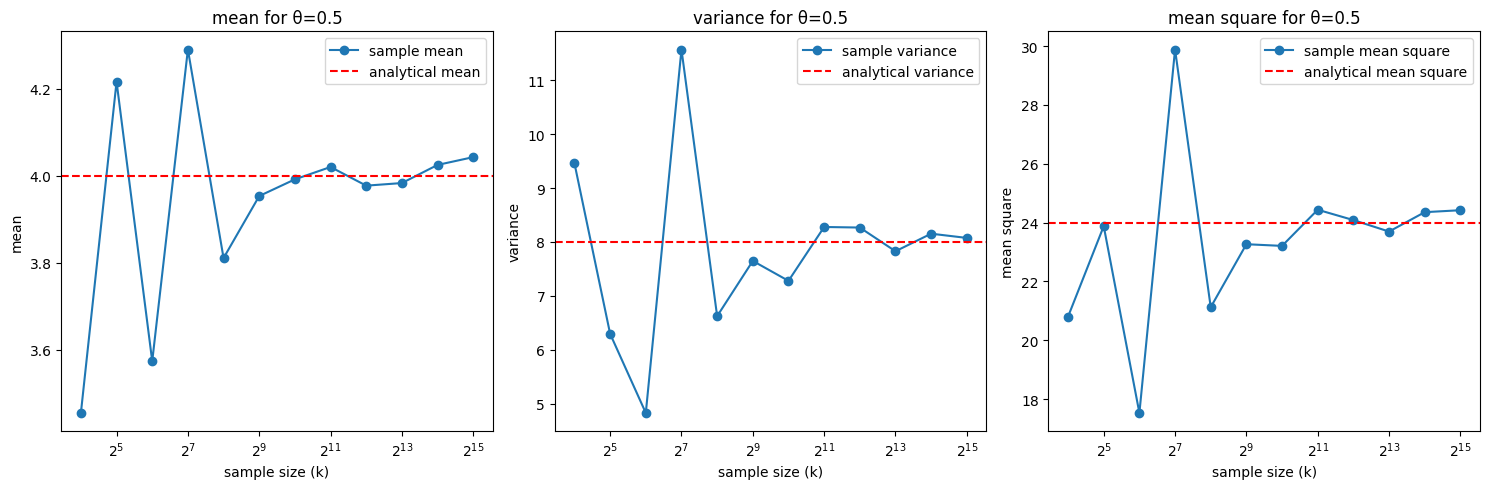

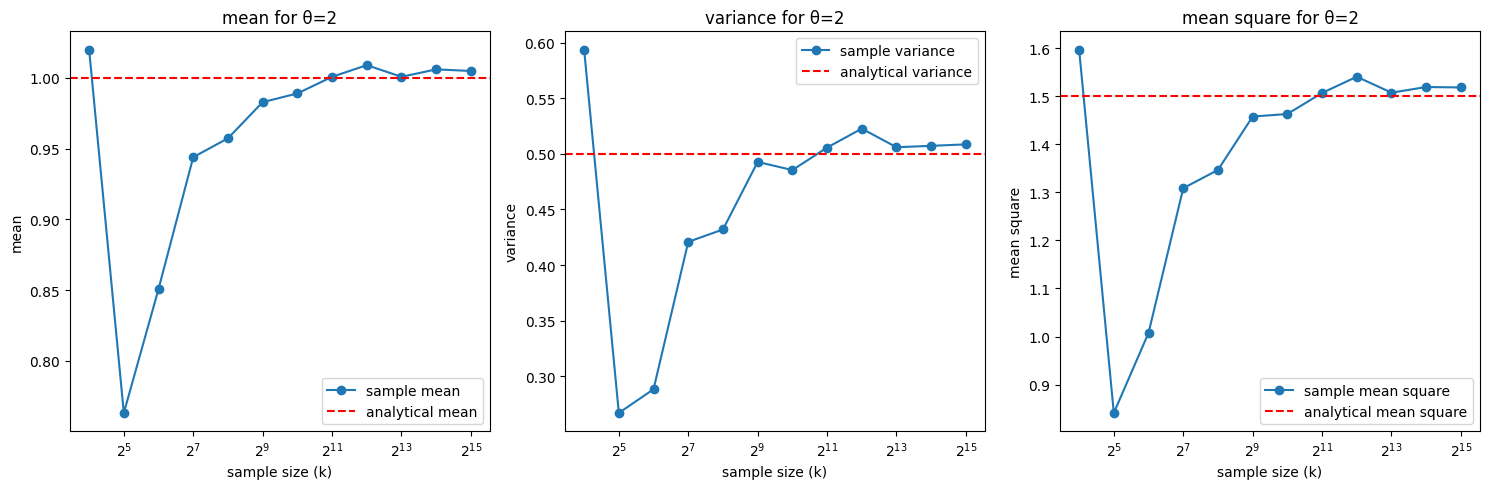

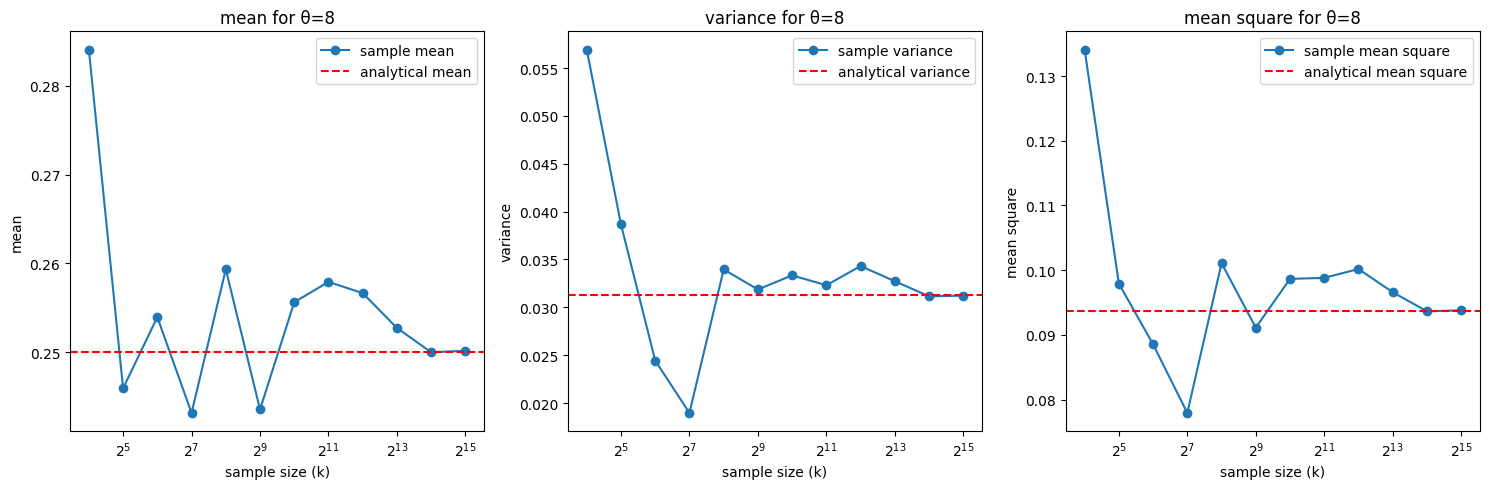

In [6]:
import numpy as np

import matplotlib.pyplot as plt

def f_xi(x, theta):
    return theta**2 * x * np.exp(-theta * x)

def sample_statistics(sample):
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)
    sample_mean_square = np.mean(sample**2)
    return sample_mean, sample_variance, sample_mean_square

thetas = [0.5, 2, 8]
ks = [2**i for i in range(4, 16)]
results = {theta: {'mean': [], 'variance': [], 'mean_square': []} for theta in thetas}
for theta in thetas:
    for k in ks:
        sample = np.random.gamma(2, 1/theta, k)
        mean, variance, mean_square = sample_statistics(sample)
        results[theta]['mean'].append(mean)
        results[theta]['variance'].append(variance)
        results[theta]['mean_square'].append(mean_square)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(ks, results[theta]['mean'], marker='o', label='sample mean')
    plt.axhline(y=2/theta, color='r', linestyle='--', label='analytical mean')
    plt.xscale('log', base=2)
    plt.xlabel('sample size (k)')
    plt.ylabel('mean')
    plt.title(f'mean for θ={theta}')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(ks, results[theta]['variance'], marker='o', label='sample variance')
    plt.axhline(y=2 / (theta**2), color='r', linestyle='--', label='analytical variance')
    plt.xscale('log', base=2)
    plt.xlabel('sample size (k)')
    plt.ylabel('variance')
    plt.title(f'variance for θ={theta}')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(ks, results[theta]['mean_square'], marker='o', label='sample mean square')
    plt.axhline(y=6 / (theta**2), color='r', linestyle='--', label='analytical mean square')
    plt.xscale('log', base=2)
    plt.xlabel('sample size (k)')
    plt.ylabel('mean square')
    plt.title(f'mean square for θ={theta}')
    plt.legend()

    plt.tight_layout()
    plt.show()

### 2. Дана плотность распределения случайной величины:
 
$f_\xi^{\lambda,a}(x) = \begin{cases} \lambda e^{-\lambda (x - a)}, x >= a \\ 0, \text{else} \end{cases}$

Пусть $(\lambda, a) = (2,2)$

(a) Аналитически вычислите значение моды, математического ожидания и медианы.

Математическое ожидание:

$$
E[\xi] = \int_{a}^{\infty} x f_\xi^{\lambda,a}(x) dx = \int_{2}^{\infty} x \cdot 2 e^{-2 (x - 2)} dx = 2 \int_{2}^{\infty} x e^{-2x + 4} dx = 2 e^{4} \int_{2}^{\infty} x e^{-2x} dx
$$
$$
2 e^{4} \int_{2}^{\infty} x e^{-2x} dx = 2 e^{4} \left[ -\frac{1}{2} x e^{-2x} \Big|_{2}^{\infty} + \frac{1}{2} \int_{2}^{\infty} e^{-2x} dx \right] = 2 e^{4} \left[ e^{-4} + \frac{1}{2} \cdot \left( -\frac{1}{2} e^{-2x} \Big|_{2}^{\infty} \right) \right] = 2 e^{4} \left[ e^{-4} + \frac{1}{4} e^{-4} \right]
$$
$$
= 2 e^{4} \cdot \frac{5}{4} e^{-4} = \frac{5}{2}
$$

Медиана:

$$
P(\xi \leq m) = 0.5
$$
$$
\int_{2}^{m} 2 e^{-2 (x - 2)} dx = \int_{2}^{m} 2 e^{-2x + 4} dx = 2 e^{4} \int_{2}^{m} e^{-2x} dx = 2 e^{4} \left( -\frac{1}{2} e^{-2x} \Big|_{2}^{m} \right) = 2 e^{4} \left( -\frac{1}{2} e^{-2m} + \frac{1}{2} e^{-4} \right) = e^{4} \left( e^{-4} - e^{-2m} \right)
$$
$$
e^{4} \left( e^{-4} - e^{-2m} \right) = 1 - e^{4 - 2m} = 0.5
$$
$$
m = 2 - \frac{\ln(0.5)}{2} = 2 + \frac{\ln(2)}{2}
$$

Мода:

$$
f_\xi(x)' = (2 e^{-2 (x - 2)})' = -4 e^{-2 (x - 2)}
$$
$$
x >= 2 => f_\xi(x)' < 0
$$
$$
x = 2 \text{ - мода}
$$

(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического жидания и медианы.

$$
F_\xi(x) = u => x = -\frac{\ln(1-u)}{2} + 2
$$


In [14]:
def generate_sample(size):
    u = np.random.uniform(0, 1, size)
    sample = -np.log(1 - u) / 2 + 2
    return sample

def mode_estimate(sample, bins=30):
    counts, bin_edges = np.histogram(sample, bins=bins)
    max_index = np.argmax(counts)
    mode = (bin_edges[max_index] + bin_edges[max_index + 1]) / 2
    return mode

def median_estimate(sample):
    return np.median(sample)

def mean_estimate(sample):
    return np.mean(sample)


big_sample_size = 10000
small_sample_size = 20

lambda_param = 2
a_param = 2

big_sample = generate_sample(big_sample_size)
small_sample = generate_sample(small_sample_size)

big_mode = mode_estimate(big_sample)
big_median = median_estimate(big_sample)
big_mean = mean_estimate(big_sample)
small_mode = mode_estimate(small_sample)
small_median = median_estimate(small_sample)
small_mean = mean_estimate(small_sample)

print(f"Big sample estimates:\nMode: {big_mode}\nMedian: {big_median}\nMean: {big_mean}\n")
print(f"Small sample estimates:\nMode: {small_mode}\nMedian: {small_median}\nMean: {small_mean}\n")

Big sample estimates:
Mode: 2.0779925816714524
Median: 2.338328914293134
Mean: 2.494877763934664

Small sample estimates:
Mode: 2.069675564573269
Median: 2.380741334301822
Mean: 2.4985169886260854



(c) Постройте для первой выборки на одном графике: гистограмму  распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического жидания и медианы. То же самое, для второй.

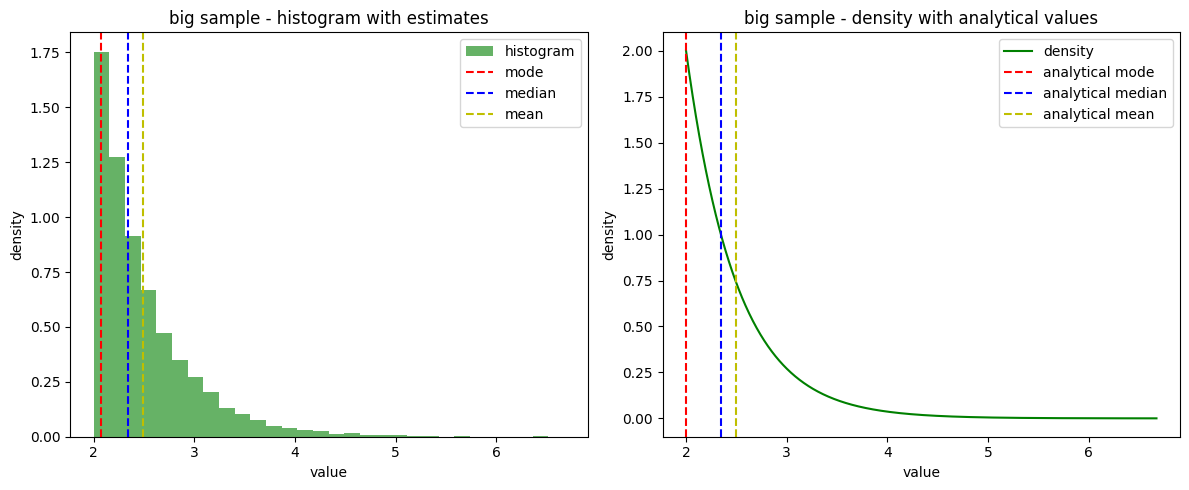

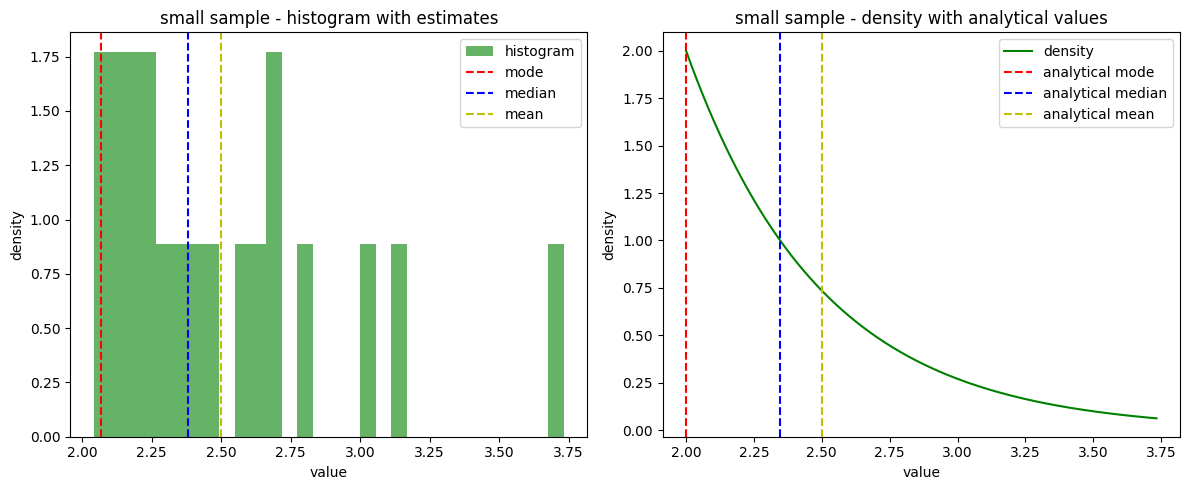

In [15]:
def plot_sample_analysis(sample, lambda_param, a_param, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label='histogram')
    mode = mode_estimate(sample)
    median = median_estimate(sample)
    mean = mean_estimate(sample)
    plt.axvline(mode, color='r', linestyle='--', label='mode')
    plt.axvline(median, color='b', linestyle='--', label='median')
    plt.axvline(mean, color='y', linestyle='--', label='mean')
    plt.title(f'{title} - histogram with estimates')
    plt.xlabel('value')
    plt.ylabel('density')
    plt.legend()

    plt.subplot(1, 2, 2)
    x = np.linspace(a_param, np.max(sample), 1000)
    pdf = lambda_param * np.exp(-lambda_param * (x - a_param))
    plt.plot(x, pdf, label='density', color='g')
    plt.axvline(2, color='r', linestyle='--', label='analytical mode')
    analytical_median = 2 + np.log(2) / 2
    plt.axvline(analytical_median, color='b', linestyle='--', label='analytical median')
    analytical_mean = 5 / 2
    plt.axvline(analytical_mean, color='y', linestyle='--', label='analytical mean')
    plt.title(f'{title} - density with analytical values')
    plt.xlabel('value')
    plt.ylabel('density')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_sample_analysis(big_sample, lambda_param, a_param, 'big sample')
plot_sample_analysis(small_sample, lambda_param, a_param, 'small sample')

(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет

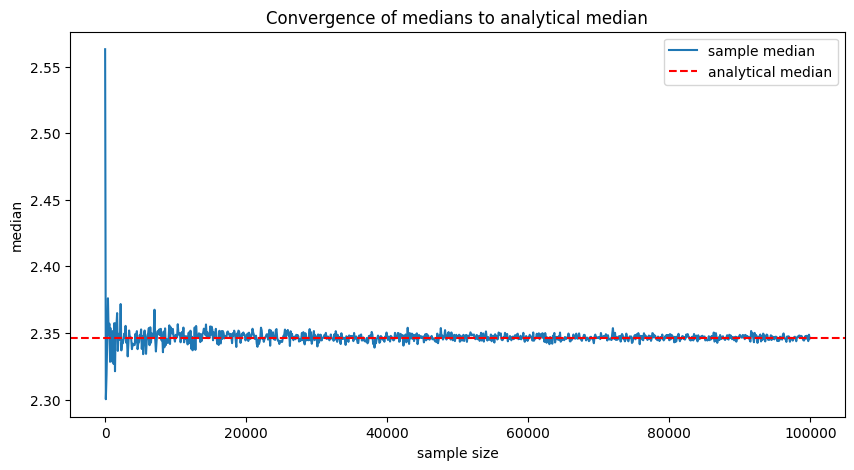

In [29]:
sample_sizes = [i for i in range(10, 100000, 100)]
medians = []
for size in sample_sizes:
    sample = generate_sample(size)
    median = median_estimate(sample)
    medians.append(median)
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, medians,  label='sample median', markersize=0.5)
plt.axhline(y=2 + np.log(2) / 2, color='r', linestyle='--', label='analytical median')
plt.xlabel('sample size')
plt.ylabel('median')
plt.title('Convergence of medians to analytical median')
plt.legend()
plt.show()

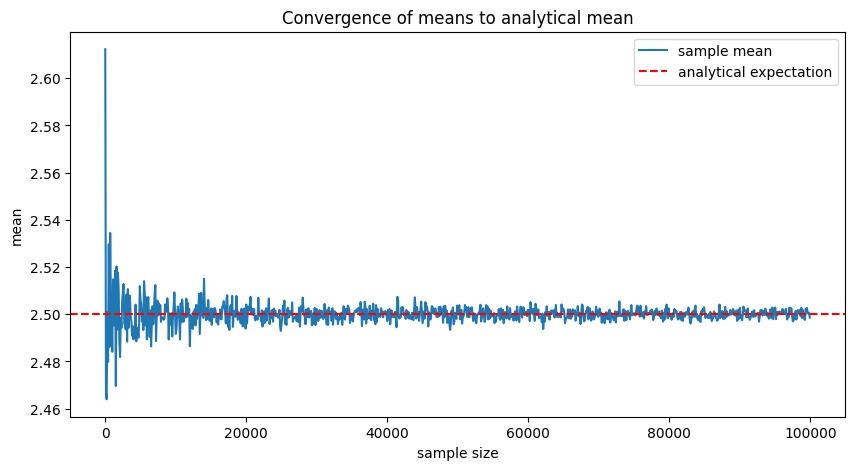

In [31]:
means = []
for size in sample_sizes:
    sample = generate_sample(size)
    mean = mean_estimate(sample)
    means.append(mean)
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, means,  label='sample mean', markersize=0.5)
plt.axhline(y=5 / 2, color='r', linestyle='--', label='analytical expectation')
plt.xlabel('sample size')
plt.ylabel('mean')
plt.title('Convergence of means to analytical mean')
plt.legend()
plt.show()


### Моделирование совместного распределения двух случайных величин

Пусть совместное распределение двух случайных величин задано таблицей

| $\xi \backslash \eta$ | 1 | 2 | 3 | ... |
|:---------------------:|---:|---:|---:|-----:|
| -1                    | $\frac{2}{5} \cdot \frac{1}{2^1}$ |  $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | ... |
| 0                     | $\frac{1}{5} \cdot \frac{1}{2^1}$ |  $\frac{1}{5} \cdot \frac{1}{2^2}$ | $\frac{1}{5} \cdot \frac{1}{2^3}$ | ... |
| 1                     | $\frac{2}{5} \cdot \frac{1}{2^1}$ |  $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | ... |

где $\xi$ принимает все значения из N.  
Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

---

Аналитическое вычисление

---

P($\xi = x$, $\eta = y$) = $\begin{cases} \frac{2}{5} \cdot \frac{1}{2^y}, x = -1 \\ \frac{1}{5} \cdot \frac{1}{2^y}, x = 0 \\ \frac{2}{5} \cdot \frac{1}{2^y}, x = 1\end{cases}$ = $\frac{x^2 + 1}{5} \cdot \frac{1}{2^y}$, $x \in {-1, 0, 1}$, $y \in N$

Маргинальные распределения:
$$
P(\xi = x) = \sum_{y=1}^{\infty} P(\xi = x, \eta = y) = \frac{x^2 + 1}{5} \sum_{y=1}^{\infty} \frac{1}{2^y} = \frac{x^2 + 1}{5} \cdot 1 = \frac{x^2 + 1}{5}
$$

| $\xi$ | -1 | 0 | 1 |
|:-----:|---:|---:|---:|
| P     | 2/5 | 1/5 | 2/5 |

$$
P(\eta = y) = \sum_{x \in \{-1,0,1\}} P(\xi = x, \eta = y) = \sum_{x \in \{-1,0,1\}} \frac{x^2 + 1}{5} \cdot \frac{1}{2^y} = \frac{1}{2^y} \cdot \frac{1}{5} \sum_{x \in \{-1,0,1\}} (x^2 + 1) = \frac{1}{2^y} \cdot \frac{1}{5} (2 + 1 + 2) = \frac{1}{2^y}
$$

| $\eta$ | 1 | 2 | 3 | ... |
|:------:|---:|---:|---:|-----:|
| P      | 1/2 | 1/4 | 1/8 | ... |


Математическое ожидание:
$$
E[\xi] = \sum_{x \in \{-1,0,1\}} x \cdot P(\xi = x) = -1 \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = 0
$$
$$
E[\xi^2] = \sum_{x \in \{-1,0,1\}} x^2 \cdot P(\xi = x) = 1 \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = \frac{4}{5}
$$
$$
E[\eta] = \sum_{y=1}^{\infty} y \cdot P(\eta = y) = \sum_{y=1}^{\infty} y \cdot \frac{1}{2^y}
$$
$$
\sum_{y=1}^{\infty} y \cdot \frac{1}{2^y} = \sum_{y=1}^{\infty} y \cdot r^y = \frac{r}{(1-r)^2}, r = \frac{1}{2} => E[\eta] = 2
$$
$$
E[\eta^2] = \sum_{y=1}^{\infty} y^2 \cdot P(\eta = y) = \sum_{y=1}^{\infty} y^2 \cdot \frac{1}{2^y}
$$
$$
\sum_{y=1}^{\infty} y^2 \cdot \frac{1}{2^y} = \sum_{y=1}^{\infty} y^2 \cdot r^y = \frac{r(1+r)}{(1-r)^3}, r = \frac{1}{2} => E[\eta^2] = 6
$$

Дисперсия:
$$
D[\xi] = E[\xi^2] - (E[\xi])^2 = \frac{4}{5} - 0^2 = \frac{4}{5}
$$
$$
D[\eta] = E[\eta^2] - (E[\eta])^2 = 6 - 2^2 = 2
$$

Корреляционная матрица:

$$
E[\xi \eta] = \sum_{x \in \{-1,0,1\}} \sum_{y=1}^{\infty} x y P(\xi = x, \eta = y) = \sum_{x \in \{-1,0,1\}} \sum_{y=1}^{\infty} x y \cdot \frac{x^2 + 1}{5} \cdot \frac{1}{2^y}
$$
$$
= \sum_{x \in \{-1,0,1\}} \frac{x (x^2 + 1)}{5} \sum_{y=1}^{\infty} \frac{y}{2^y} = 0
$$
$$
cov(\xi, \eta) = E[(\xi - E[\xi])(\eta - E[\eta])] = E[\xi \eta] - E[\xi] E[\eta] = 0 - 0 \cdot 2 = 0
$$
$$
corr(\xi, \xi) = \frac{cov(\xi, \xi)}{\sqrt{D[\xi] D[\xi]}} = \frac{D[\xi]}{D[\xi]} = 1
$$
$$
corr(\eta, \eta) = \frac{cov(\eta, \eta)}{\sqrt{D[\eta] D[\eta]}} = \frac{D[\eta]}{D[\eta]} = 1
$$
$$
corr(\xi, \eta) = corr(\eta, \xi) = \frac{cov(\xi, \eta)}{\sqrt{D[\xi] D[\eta]}} = \frac{0}{\sqrt{\frac{4}{5} \cdot 2}} = 0
$$
$$
\text{Корреляционная матрица} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
$$

---

Приближенное вычисление

---


In [46]:
def joint_distribution():
    x_values = [-1, 0, 1]
    y_values = np.arange(1, 30)
    probs = np.array([[((x**2 + 1) / 5) * (1 / (2**y)) for y in y_values] for x in x_values])
    probs /= probs.sum()
    
    return x_values, y_values, probs

def sample_joint_distribution(size):
    x_values, y_values, probs = joint_distribution()
    flat_probs = probs.flatten()
    indices = np.random.choice(len(flat_probs), size=size, p=flat_probs)
    x_indices, y_indices = np.unravel_index(indices, probs.shape)
    samples_x = [x_values[i] for i in x_indices]
    samples_y = [y_values[j] for j in y_indices]
    return np.array(samples_x), np.array(samples_y)

def compute_statistics(samples_x, samples_y):
    mean_x = np.mean(samples_x)
    mean_y = np.mean(samples_y)
    var_x = np.var(samples_x, ddof=1)
    var_y = np.var(samples_y, ddof=1)
    cov_xy = np.cov(samples_x, samples_y, ddof=1)[0][1]
    corr_xy = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
    return mean_x, mean_y, var_x, var_y, cov_xy, corr_xy

sample_size = 100000
samples_x, samples_y = sample_joint_distribution(sample_size)
mean_x, mean_y, var_x, var_y, cov_xy, corr_xy = compute_statistics(samples_x, samples_y)
print(f"sample size: {sample_size}")
print(f"mean ξ: {mean_x}, mean η: {mean_y}")
print(f"variance ξ: {var_x}, variance η: {var_y}")
print(f"covariance ξ, η: {cov_xy}")
print(f"correlation ξ, η: {corr_xy}")
corr_matrix = np.corrcoef(samples_x, samples_y)
print("correlation matrix:")
print(corr_matrix)

sample size: 100000
mean ξ: 0.00079, mean η: 1.99458
variance ξ: 0.8010773866738667, variance η: 1.9894105177051769
covariance ξ, η: 0.0009042908429084667
correlation ξ, η: 0.0007163226638136862
correlation matrix:
[[1.00000000e+00 7.16322664e-04]
 [7.16322664e-04 1.00000000e+00]]
